In [1]:
!pip install requests pandas numpy scikit-learn matplotlib


In [2]:
import requests
import pandas as pd

# Replace with the actual API endpoint and your API key
api_url = "https://alpha-vantage.p.rapidapi.com/query"
querystring = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",  # Replace with the desired stock symbol
    "datatype": "json"
}

headers = {
    "X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com",
    "X-RapidAPI-Key": "2740cd52b9mshe08ab85bf1ba432p14e55fjsn52baf2fcbfe7"  
}

response = requests.get(api_url, headers=headers, params=querystring)
data = response.json()

# Convert data to a pandas DataFrame
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Display a small set of KPIs
print("Stock Data KPIs:")
print("Number of Data Points:", len(df))
print("Sample Data:")
print(df.head())


Stock Data KPIs:
Number of Data Points: 100
Sample Data:
             1. open   2. high    3. low  4. close 5. volume
2023-03-14  151.2800  153.4000  150.1000  152.5900  73695893
2023-03-15  151.1900  153.2450  149.9200  152.9900  77167866
2023-03-16  152.1600  156.4600  151.6400  155.8500  76254419
2023-03-17  156.0800  156.7400  154.2800  155.0000  98944633
2023-03-20  155.0700  157.8200  154.1500  157.4000  73641415


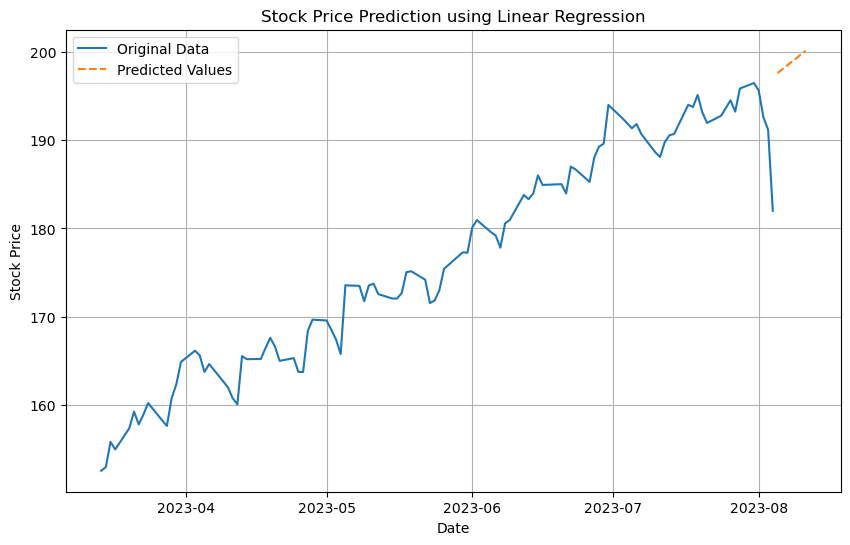

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare data for prediction
df['date_idx'] = np.arange(len(df))
X = df['date_idx'].values.reshape(-1, 1)
y = df['4. close'].astype(float)

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_days = 7
future_dates = pd.date_range(start=df.index[-1], periods=future_days + 1)
future_dates = future_dates[1:]  # Exclude the last date

# Generate indices for future dates
future_dates_idx = np.arange(len(df), len(df) + future_days)

# Predict future values using the model
future_predictions = model.predict(future_dates_idx.reshape(-1, 1))

# Plot the original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Original Data')
plt.plot(future_dates, future_predictions, label='Predicted Values', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.grid()
plt.show()
